<a href="https://colab.research.google.com/github/rodrigosimoncalaca/projectDataScience/blob/master/SegmentacaoClientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Analisando Dados de Segmentação de Clientes através de Cluster**

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
#importando as bibliotecas necessárias
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
%matplotlib inline

## Obtendo Dados


In [0]:

dataset = pd.read_csv('/content/Mall_Customers.csv')

## Primeiras Análises

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

In [6]:
# Executar para mostrar as 5 primeiras linhas, e entendermos a estrutura para montar um dicionário das variáveis
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



## Dicionário de Dados

   
* CustomerID: ID
* Gender: Gênero
* Age: Idade
* Annual Income K$: Receita Anual
* Speding Score (1-100): Pontuação de Gastos



### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

In [7]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(dataset.shape[0]))
print("Variáveis:\t {}\n".format(dataset.shape[1]))

# verificar os tipos das variáveis
display(dataset.dtypes)

Entradas:	 200
Variáveis:	 5



CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.


In [8]:
# ordenar em ordem decrescente as variáveis pela porcentagem de valores ausentes
(dataset.isnull().sum() / dataset.shape[0]).sort_values(ascending=False)*100

Spending Score (1-100)    0.0
Annual Income (k$)        0.0
Age                       0.0
Gender                    0.0
CustomerID                0.0
dtype: float64

### **Q3. Construindo o modelo**

KMeans Algoritmo é usado decidir o número ideal de cluster,através do método Elbow.

In [0]:
#Váriavel alocada para considerar apenas a coluna receita anual e pontuação de gastos
X= dataset.iloc[:, [3,4]].values

In [0]:
from sklearn.cluster import KMeans
wcss=[]

In [0]:
#fórmula usada para segregar os pontos de dados em clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

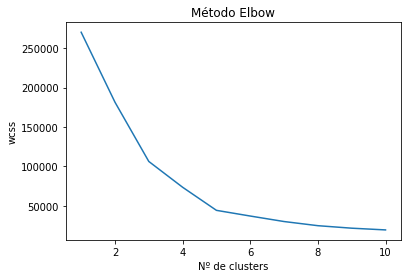

In [13]:
plt.plot(range(1,11), wcss)
plt.title('Método Elbow')
plt.xlabel('Nº de clusters')
plt.ylabel('wcss')
plt.show()

*Se diminuir o zoom nessa curva, podemos visualizar o último cotovelo em k = 5. Não importa o intervalo que selecionamos ex- (1,21), também veremos o mesmo comportamento, mas se escolhermos um intervalo mais alto, será pouco difícil visualizar o COTOVELO, é por isso que geralmente usamos o intervalo (1,11).*
**Concluimos então que k = 5**

In [0]:
#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

*Para aprendizado não supervisionado, usamos "fit_predict ()", e para aprendizado supervisionado usamos "fit_tranform ()".
A variável y_kmeans é o modelo final. Agora, como e onde vamos implantar esse modelo na produção depende de qual ferramenta estamos usando. Neste caso de uso é muito comum e usado no setor de BFS (cartão de crédito) e no varejo para segmentação de clientes.*

### **Q4. Visualizando os Clusters**

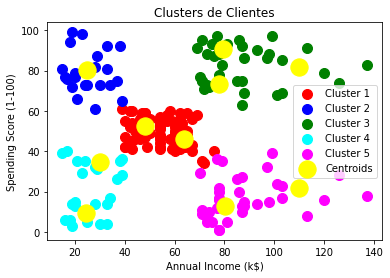

In [16]:

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters de Clientes')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Conclusões

* Cluster 1 (Red Color) -> ganhando alto, mas gastando menos
* Cluster 2 (Blue Colr) -> média em termos de ganhos e gastos
* Cluster 3 (Cor verde) -> ganhando alto e gastando alto 
* Cluster 4 (ciano Color) -> ganhando menos, mas gastando mais
* Cluster 5 (cor magenta) -> ganhando menos, gastando menos


Uma opção serias colocar o Cluster 3 em algum sistema de alerta, onde o email pode ser enviado diariamente, para os outros podemos definir uma vez por semana ou uma vez por mês

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial e para entedermos a função de Clusters.